# Cleaning Data

<a class="anchor" id="1."></a> 
# Diagnose data for cleaning

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from subprocess import check_output
import os
#print(check_output(["ls", "../input"]).decode("utf8"))
data = pd.read_csv('_outputs/all_17-18-19_port_pas_23hataliport___class_analysis.csv')
#data.info()
data.head()

,class_id,x,y,w,h,center_x,center_y,area,region
0,3,0.964453,0.313889,0.030469,0.080556,0.979688,0.354167,0.002454,1
1,3,0.963672,0.329861,0.030469,0.079167,0.978907,0.369445,0.002412,1
2,3,0.967969,0.329167,0.031250,0.077778,0.983594,0.368056,0.002431,1
3,3,0.962500,0.329861,0.031250,0.076389,0.978125,0.368055,0.002387,1
4,3,0.962109,0.336806,0.032031,0.076389,0.978124,0.375001,0.002447,1


In [2]:
data.tail()

,class_id,x,y,w,h,center_x,center_y,area,region
156,3,0.968750,0.281944,0.031250,0.091667,0.984375,0.327777,0.002865,1
157,3,0.962109,0.292361,0.032031,0.084722,0.978124,0.334722,0.002714,1
158,3,0.972266,0.301389,0.032031,0.083333,0.988282,0.343056,0.002669,1
159,3,0.970313,0.309028,0.031250,0.081944,0.985938,0.350000,0.002561,1
160,0,0.501563,0.397222,0.048438,0.088889,0.525782,0.441667,0.004306,1


In [3]:
data.columns

Index(['class_id', 'x', 'y', 'w', 'h', 'center_x', 'center_y', 'area',
       'region'],
      dtype='object')

In [35]:
data.shape

(526, 9)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   class_id  526 non-null    int64  
 1   x         526 non-null    float64
 2   y         526 non-null    float64
 3   w         526 non-null    float64
 4   h         526 non-null    float64
 5   center_x  526 non-null    float64
 6   center_y  526 non-null    float64
 7   area      526 non-null    float64
 8   region    526 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 37.1 KB


<a class="anchor" id="2."></a> 
#  Exploratory data analysis (EDA)

In [37]:
print(data['class_id'].value_counts(dropna =False))  # if there are nan values that also be counted

2    312
1    110
0    104
Name: class_id, dtype: int64


In [38]:
data.describe() #ignore null entries

,class_id,x,y,w,h,center_x,center_y,area,region
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,1.395437,0.503825,0.400256,0.061056,0.107927,0.534353,0.454220,0.006992,1.996198
std,0.797316,0.038896,0.068780,0.015808,0.026153,0.043099,0.065553,0.002672,1.091955
min,0.000000,0.470313,0.310417,0.029687,0.055556,0.485156,0.370833,0.001649,1.000000
25%,1.000000,0.471875,0.316840,0.065625,0.116667,0.506250,0.376389,0.008021,1.000000
50%,2.000000,0.473438,0.454167,0.067187,0.120833,0.507032,0.483334,0.008118,2.000000
75%,2.000000,0.550781,0.455556,0.068750,0.120833,0.585156,0.516667,0.008203,2.000000
max,2.000000,0.553125,0.459028,0.073438,0.125000,0.589063,0.519444,0.008874,4.000000


In [39]:
data.corr()

,class_id,x,y,w,h,center_x,center_y,area,region
class_id,1.000000,0.630020,-0.624061,0.884124,0.865372,0.730711,-0.482161,0.882782,-0.912766
x,0.630020,1.000000,-0.215239,0.458987,0.482274,0.986637,-0.129633,0.491125,-0.395255
y,-0.624061,-0.215239,1.000000,-0.517065,-0.336047,-0.289071,0.982193,-0.444516,0.740425
w,0.884124,0.458987,-0.517065,1.000000,0.975045,0.597611,-0.348020,0.995591,-0.954130
h,0.865372,0.482274,-0.336047,0.975045,1.000000,0.614050,-0.153114,0.990769,-0.878997
center_x,0.730711,0.986637,-0.289071,0.597611,0.614050,1.000000,-0.180813,0.625806,-0.531684
center_y,-0.482161,-0.129633,0.982193,-0.348020,-0.153114,-0.180813,1.000000,-0.268764,0.601535
area,0.882782,0.491125,-0.444516,0.995591,0.990769,0.625806,-0.268764,1.000000,-0.926670
region,-0.912766,-0.395255,0.740425,-0.954130,-0.878997,-0.531684,0.601535,-0.926670,1.000000


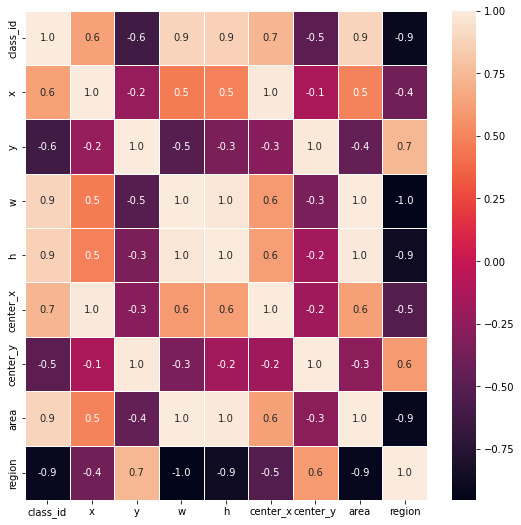

In [40]:
#correlation map
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<a class="anchor" id="3."></a> 
# Visual exploratory data analysis

<AxesSubplot:title={'center':'class_id'}, xlabel='region'>

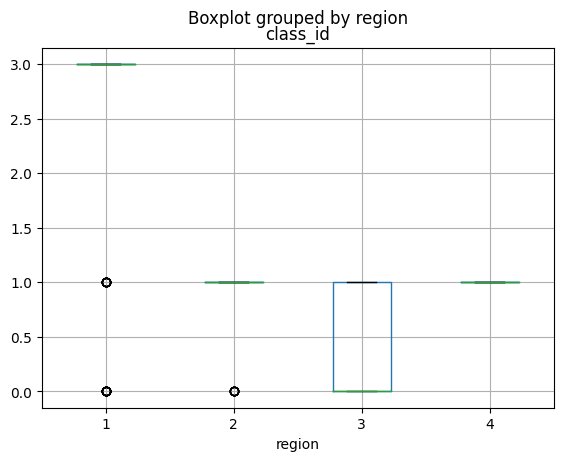

In [4]:
data.boxplot(column='class_id',by = 'region')
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers

<a class="anchor" id="4."></a> 
# Tidy data

In [5]:
data_new = data.head()    # I only take 5 rows into new data
data_new

,class_id,x,y,w,h,center_x,center_y,area,region
0,3,0.964453,0.313889,0.030469,0.080556,0.979688,0.354167,0.002454,1
1,3,0.963672,0.329861,0.030469,0.079167,0.978907,0.369445,0.002412,1
2,3,0.967969,0.329167,0.031250,0.077778,0.983594,0.368056,0.002431,1
3,3,0.962500,0.329861,0.031250,0.076389,0.978125,0.368055,0.002387,1
4,3,0.962109,0.336806,0.032031,0.076389,0.978124,0.375001,0.002447,1


In [6]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars = 'class_id', value_vars= ['region'])
melted

,class_id,variable,value
0,3,region,1
1,3,region,1
2,3,region,1
3,3,region,1
4,3,region,1


<a class="anchor" id="6."></a> 
# Concatenating data

In [7]:
# Firstly lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,class_id,x,y,w,h,center_x,center_y,area,region
0,3,0.964453,0.313889,0.030469,0.080556,0.979688,0.354167,0.002454,1
1,3,0.963672,0.329861,0.030469,0.079167,0.978907,0.369445,0.002412,1
2,3,0.967969,0.329167,0.031250,0.077778,0.983594,0.368056,0.002431,1
3,3,0.962500,0.329861,0.031250,0.076389,0.978125,0.368055,0.002387,1
4,3,0.962109,0.336806,0.032031,0.076389,0.978124,0.375001,0.002447,1
5,3,0.968750,0.281944,0.031250,0.091667,0.984375,0.327777,0.002865,1
6,3,0.962109,0.292361,0.032031,0.084722,0.978124,0.334722,0.002714,1
7,3,0.972266,0.301389,0.032031,0.083333,0.988282,0.343056,0.002669,1
8,3,0.970313,0.309028,0.031250,0.081944,0.985938,0.350000,0.002561,1
9,0,0.501563,0.397222,0.048438,0.088889,0.525782,0.441667,0.004306,1


In [8]:
data1 = data['area'].head()
data2= data['region'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

,area,region
0,0.002454,1
1,0.002412,1
2,0.002431,1
3,0.002387,1
4,0.002447,1


<a class="anchor" id="7."></a> 
# Data types

In [9]:
print(data.dtypes)
#data['Type 1'] = data['Type 1'].astype('category')
#data['Speed'] = data['Speed'].astype('float')
#print(data.dtypes)

class_id      int64
x           float64
y           float64
w           float64
h           float64
center_x    float64
center_y    float64
area        float64
region        int64
dtype: object


# Manipulating Data Frames with Pandas
<a class="anchor" id="9."></a> 


<a class="anchor" id="10."></a> 
# Hierarchical indexing

In [47]:
# Setting index : type 1 is outer type 2 is inner index
data1 = data.set_index(["class_id","region"]) 
data1.head(10)
# data1.loc["Fire","Flying"] # howw to use indexes

x         y         w         h  center_x  center_y  \
class_id region                                                               
0        4       0.471875  0.455556  0.029687  0.055556  0.486718  0.483334   
1        2       0.473438  0.459028  0.067187  0.120833  0.507032  0.519444   
2        2       0.550000  0.452778  0.065625  0.125000  0.582813  0.515278   
         1       0.550781  0.317361  0.073438  0.120833  0.587500  0.377777   
         1       0.473438  0.319444  0.068750  0.116667  0.507813  0.377777   
0        4       0.471875  0.455556  0.029687  0.055556  0.486718  0.483334   
1        2       0.473438  0.459028  0.067187  0.120833  0.507032  0.519444   
2        2       0.550000  0.452778  0.065625  0.125000  0.582813  0.515278   
         1       0.550781  0.317361  0.073438  0.120833  0.587500  0.377777   
         1       0.473438  0.319444  0.068750  0.116667  0.507813  0.377777   

                     area  
class_id region            
0        4       0.001649  
1        2       0.008118  
2        2       0.008203  
         1       0.008874  
         1       0.008021  
0        4       0.001649  
1        2       0.008118  
2        2       0.008203  
         1       0.008874  
         1       0.008021

# Seaborn

<a class="anchor" id="15."></a> 

 
<a class="anchor" id="17."></a> 
# Joint Plot

c:\FromUbuntu\Dataset\test\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\FromUbuntu\Dataset\test\venv\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


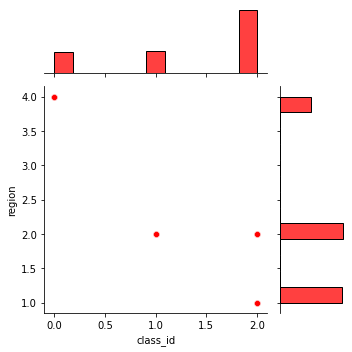

In [48]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("class_id", "region", data=data,size=5, ratio=3, color="r")


<a class="anchor" id="19."></a> 
# Lm Plot

In [49]:
data.head()

,class_id,x,y,w,h,center_x,center_y,area,region
0,0,0.471875,0.455556,0.029687,0.055556,0.486718,0.483334,0.001649,4
1,1,0.473438,0.459028,0.067187,0.120833,0.507032,0.519444,0.008118,2
2,2,0.550000,0.452778,0.065625,0.125000,0.582813,0.515278,0.008203,2
3,2,0.550781,0.317361,0.073438,0.120833,0.587500,0.377777,0.008874,1
4,2,0.473438,0.319444,0.068750,0.116667,0.507813,0.377777,0.008021,1


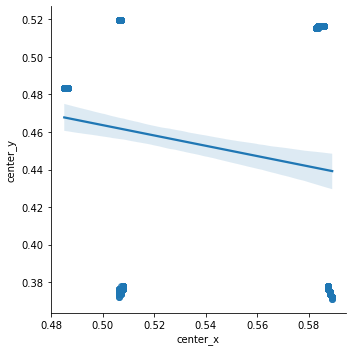

In [50]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset
sns.lmplot(x="center_x", y="center_y", data=data)
plt.show()


<a class="anchor" id="20."></a> 
# Kde Plot

c:\Users\Aircar\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


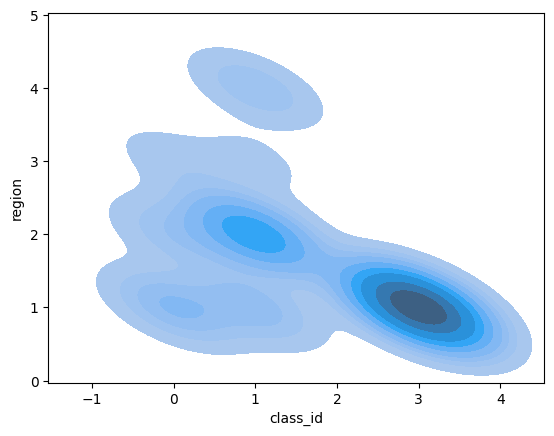

In [10]:
sns.kdeplot(data.class_id, data.region, shade=True, cut=3)
plt.show()


<a class="anchor" id="21."></a> 
# Violin Plot

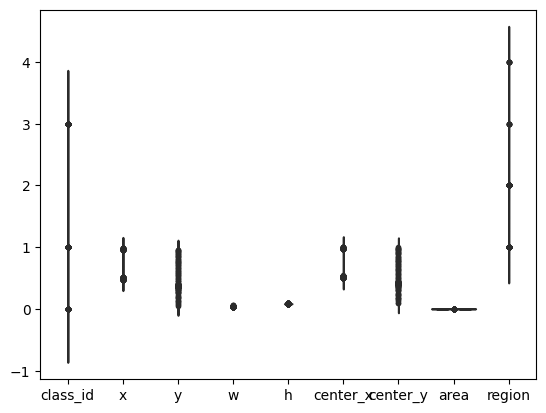

In [11]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()


<a class="anchor" id="22."></a> 
# Heatmap

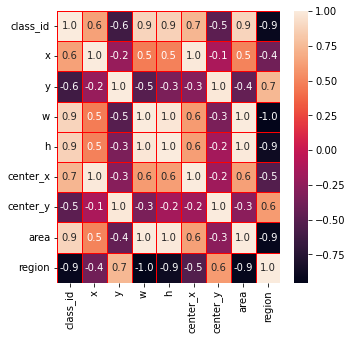

In [53]:
#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

 
<a class="anchor" id="25."></a> 
# Pair Plot

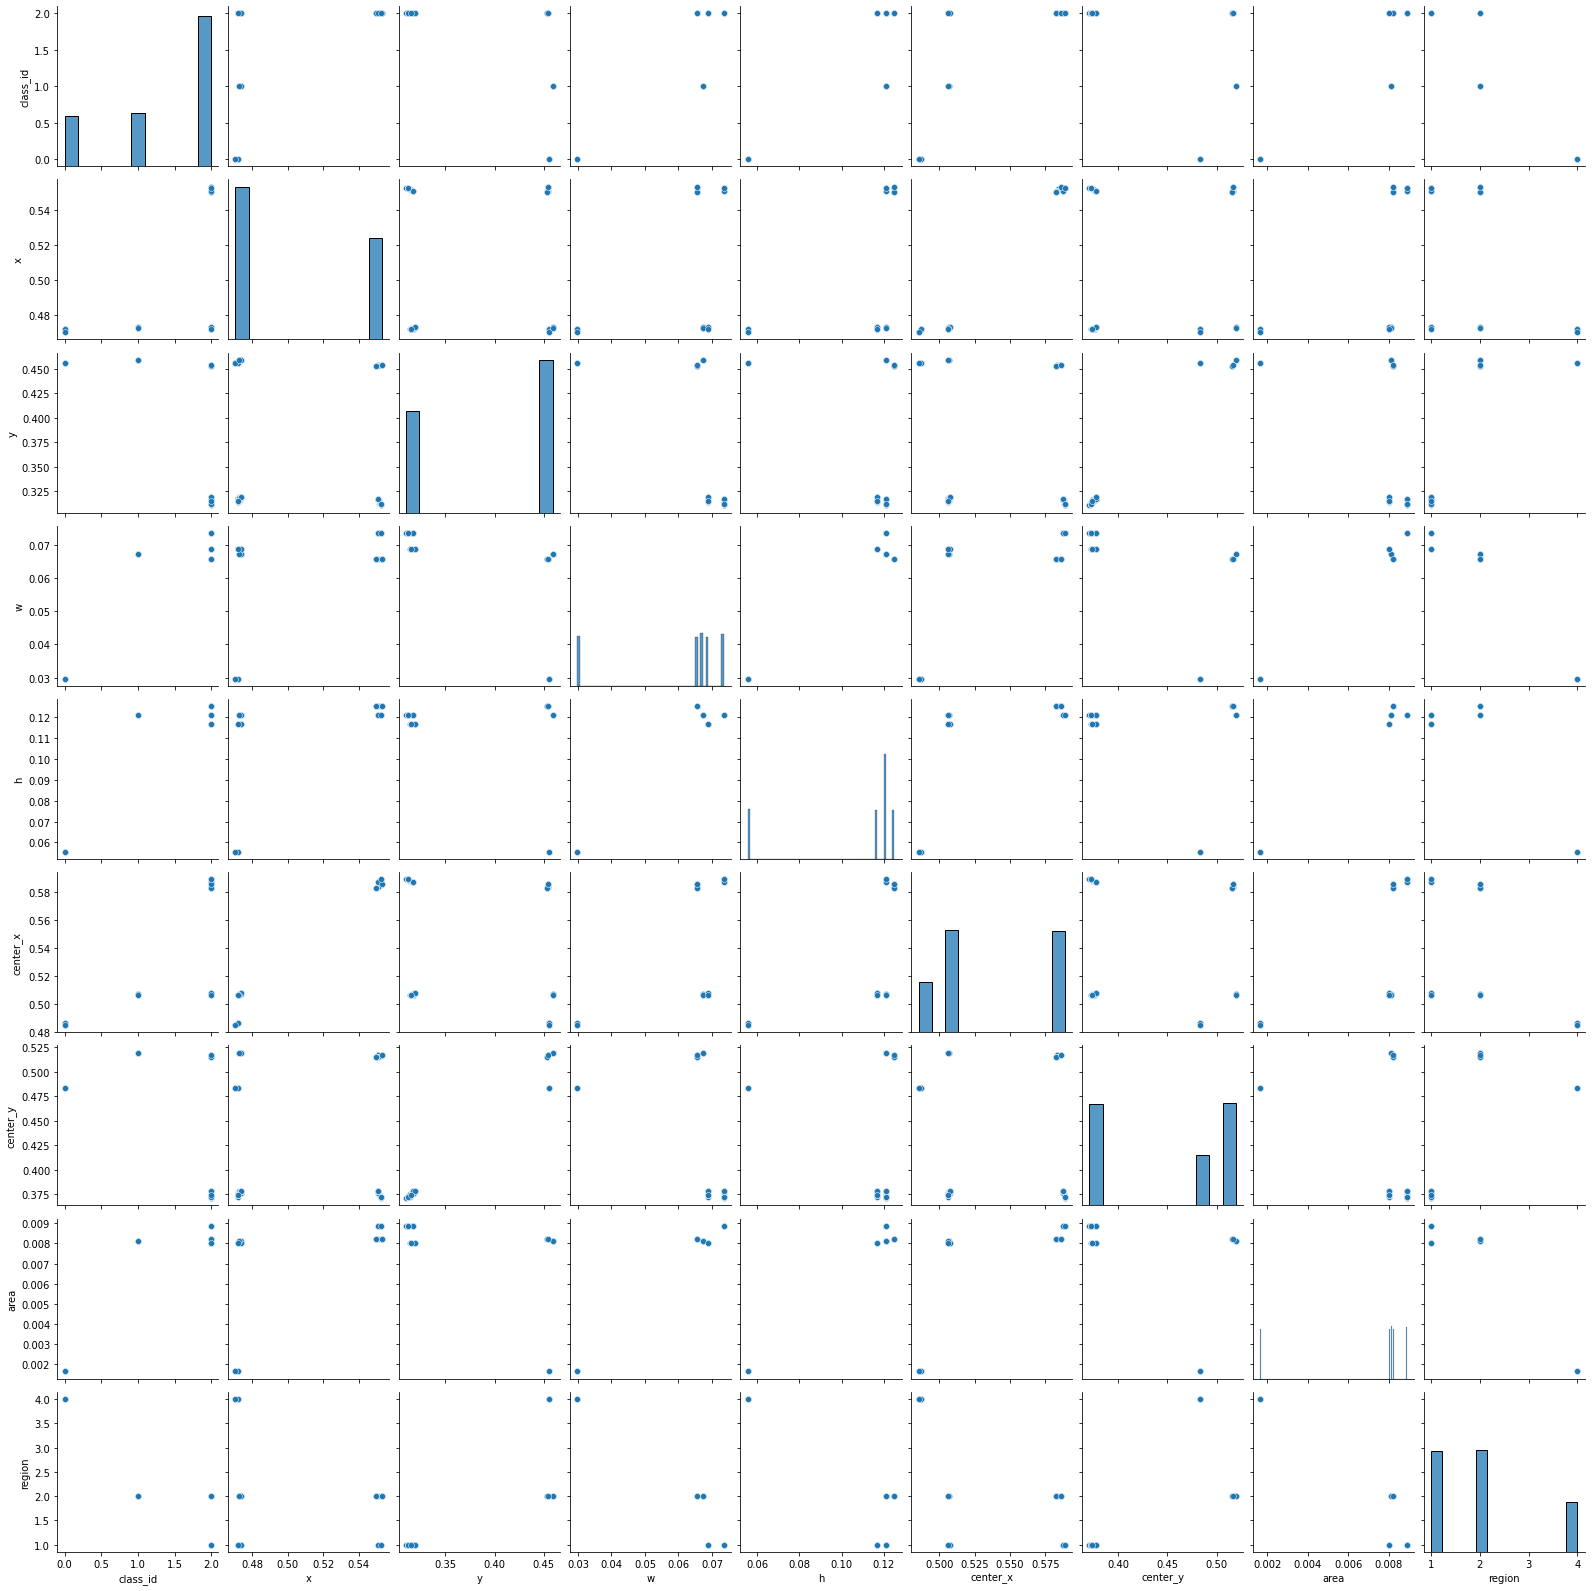

In [54]:
# pair plot
sns.pairplot(data)
plt.show()


<a class="anchor" id="26."></a> 
# Count Plot

c:\Users\Aircar\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'class_id')

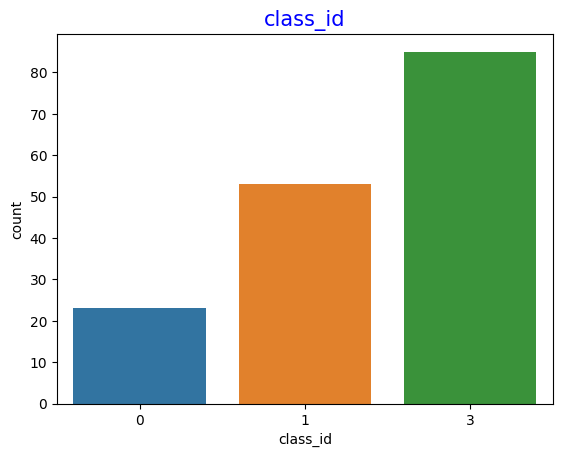

In [12]:
# kill properties
# Manner of death
sns.countplot(data.class_id)
#sns.countplot(kill.manner_of_death)
plt.title("class_id",color = 'blue',fontsize=15)